In [11]:
# Loading the Data

In [1]:
import json
import os
import matplotlib.pyplot as plt
import pytz
import numpy as np
import json
import numpy as np
import statsmodels.api as sm
import datetime, time
import pytz
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import pickle
from sklearn.model_selection import GridSearchCV

In [3]:
# extracting features
def extracting_5_agg():
    
    posting_time = []
    num_retweets = []
    num_followers = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
    for hashtag in hashtags:
        print ("Reading from file ", hashtag)
        file = open('./data/'+hashtag, encoding = 'utf8')
        for line in file:
            data = json.loads(line)
            posting_time.append(data['citation_date'])
            num_retweets.append(data['metrics']['citations']['total'])
            num_followers.append(data['author']['followers'])
        file.close()
        
    hours = int((max(posting_time)-min(posting_time))/3600)+1
    tmp = np.zeros([hours, 5])
    start_time = min(posting_time)
    start_hour = (datetime.datetime.fromtimestamp(start_time, pst_tz)).hour

    for i in range(hours):
        tmp[i,4] = (start_hour+i)%24
    for i in range(len(posting_time)):
        tmp[int((posting_time[i]-start_time)/3600), 0] += 1
        tmp[int((posting_time[i]-start_time)/3600), 1] += num_retweets[i]
        tmp[int((posting_time[i]-start_time)/3600), 2] += num_followers[i]
        if tmp[int((posting_time[i]-start_time)/3600), 3] < num_followers[i]:
            tmp[int((posting_time[i]-start_time)/3600), 3] = num_followers[i]
    return tmp

In [4]:
# # extracting features
# def extracting_3(hashtag):
#     pst_tz = pytz.timezone('America/Los_Angeles')
#     file = open('./data/'+hashtag, encoding = 'utf8')
    
#     posting_time_1 = []
#     num_retweets_1 = []
#     num_followers_1 = []
    
#     posting_time_2 = []
#     num_retweets_2 = []
#     num_followers_2 = []
    
#     posting_time_3 = []
#     num_retweets_3 = []
#     num_followers_3 = []
    
#     for line in file:
#         data = json.loads(line)
#         time = data['citation_date']
#         if (time < time1):
#             posting_time_1.append(data['citation_date'])
#             num_retweets_1.append(data['metrics']['citations']['total'])
#             num_followers_1.append(data['author']['followers'])
#         elif (time <= time2):
#             posting_time_2.append(data['citation_date'])
#             num_retweets_2.append(data['metrics']['citations']['total'])
#             num_followers_2.append(data['author']['followers'])
#         else:
#             posting_time_3.append(data['citation_date'])
#             num_retweets_3.append(data['metrics']['citations']['total'])
#             num_followers_3.append(data['author']['followers'])
        
#     file.close()
    
#     hours1 = int((max(posting_time_1)-min(posting_time_1))/3600)+1
#     tmp1 = np.zeros([hours1, 5])
#     start_time_1 = min(posting_time_1)
#     start_hour_1 = (datetime.datetime.fromtimestamp(start_time_1, pst_tz)).hour
    
#     fivemins = int((max(posting_time_2)-min(posting_time_2))/300)+1
#     tmp2 = np.zeros([fivemins, 5])
#     start_time_2 = min(posting_time_2)
#     start_5min_2 = int(((datetime.datetime.fromtimestamp(start_time_2, pst_tz)).minute)/5)
    
#     hours3 = int((max(posting_time_3)-min(posting_time_3))/3600)+1
#     tmp3 = np.zeros([hours3, 5])
#     start_time_3 = min(posting_time_3)
#     start_hour_3 = (datetime.datetime.fromtimestamp(start_time_3, pst_tz)).hour

#     for i in range(hours1):
#         tmp1[i,4] = (start_hour_1+i)%24
#     for i in range(len(posting_time_1)):
#         tmp1[int((posting_time_1[i]-start_time_1)/3600), 0] += 1
#         tmp1[int((posting_time_1[i]-start_time_1)/3600), 1] += num_retweets_1[i]
#         tmp1[int((posting_time_1[i]-start_time_1)/3600), 2] += num_followers_1[i]
#         if tmp1[int((posting_time_1[i]-start_time_1)/3600), 3] < num_followers_1[i]:
#             tmp1[int((posting_time_1[i]-start_time_1)/3600), 3] = num_followers_1[i]
            
#     for i in range(hours3):
#         tmp3[i,4] = (start_hour_3+i)%24
#     for i in range(len(posting_time_3)):
#         tmp3[int((posting_time_3[i]-start_time_3)/3600), 0] += 1
#         tmp3[int((posting_time_3[i]-start_time_3)/3600), 1] += num_retweets_3[i]
#         tmp3[int((posting_time_3[i]-start_time_3)/3600), 2] += num_followers_3[i]
#         if tmp3[int((posting_time_3[i]-start_time_3)/3600), 3] < num_followers_3[i]:
#             tmp3[int((posting_time_3[i]-start_time_3)/3600), 3] = num_followers_3[i]
    
#     for i in range(fivemins):
#         tmp2[i,4] = (start_5min_2+i)%12
#     for i in range(len(posting_time_2)):
#         tmp2[int((posting_time_2[i]-start_time_2)/300), 0] += 1
#         tmp2[int((posting_time_2[i]-start_time_2)/300), 1] += num_retweets_2[i]
#         tmp2[int((posting_time_2[i]-start_time_2)/300), 2] += num_followers_2[i]
#         if tmp2[int((posting_time_2[i]-start_time_2)/300), 3] < num_followers_2[i]:
#             tmp2[int((posting_time_2[i]-start_time_2)/300), 3] = num_followers_2[i]
            
            
#     return (tmp1, tmp2, tmp3)

In [5]:
# extracting features for aggregate

def extracting_5_3_agg():
    pst_tz = pytz.timezone('America/Los_Angeles')
    
    posting_time_1 = []
    num_retweets_1 = []
    num_followers_1 = []
    
    posting_time_2 = []
    num_retweets_2 = []
    num_followers_2 = []
    
    posting_time_3 = []
    num_retweets_3 = []
    num_followers_3 = []
    
    
    pst_tz = pytz.timezone('America/Los_Angeles')
    time1 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 8, tzinfo = pst_tz).timestamp()
    time2 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 20, tzinfo = pst_tz).timestamp()
    
    hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
    for hashtag in hashtags:
        print ("Opening: ", hashtag)
        file = open('./data/'+hashtag, encoding = 'utf8')
        for line in file:
            data = json.loads(line)
            time = data['citation_date']
            if (time < time1):
                posting_time_1.append(data['citation_date'])
                num_retweets_1.append(data['metrics']['citations']['total'])
                num_followers_1.append(data['author']['followers'])
            elif (time <= time2):
                posting_time_2.append(data['citation_date'])
                num_retweets_2.append(data['metrics']['citations']['total'])
                num_followers_2.append(data['author']['followers'])
            else:
                posting_time_3.append(data['citation_date'])
                num_retweets_3.append(data['metrics']['citations']['total'])
                num_followers_3.append(data['author']['followers'])

        file.close()
    
    hours1 = int((max(posting_time_1)-min(posting_time_1))/3600)+1
    tmp1 = np.zeros([hours1, 5])
    start_time_1 = min(posting_time_1)
    start_hour_1 = (datetime.datetime.fromtimestamp(start_time_1, pst_tz)).hour
    
    fivemins = int((max(posting_time_2)-min(posting_time_2))/300)+1
    tmp2 = np.zeros([fivemins, 5])
    start_time_2 = min(posting_time_2)
    start_5min_2 = int(((datetime.datetime.fromtimestamp(start_time_2, pst_tz)).minute)/5)
    
    hours3 = int((max(posting_time_3)-min(posting_time_3))/3600)+1
    tmp3 = np.zeros([hours3, 5])
    start_time_3 = min(posting_time_3)
    start_hour_3 = (datetime.datetime.fromtimestamp(start_time_3, pst_tz)).hour

    for i in range(hours1):
        tmp1[i,4] = (start_hour_1+i)%24
    for i in range(len(posting_time_1)):
        tmp1[int((posting_time_1[i]-start_time_1)/3600), 0] += 1
        tmp1[int((posting_time_1[i]-start_time_1)/3600), 1] += num_retweets_1[i]
        tmp1[int((posting_time_1[i]-start_time_1)/3600), 2] += num_followers_1[i]
        if tmp1[int((posting_time_1[i]-start_time_1)/3600), 3] < num_followers_1[i]:
            tmp1[int((posting_time_1[i]-start_time_1)/3600), 3] = num_followers_1[i]
            
    for i in range(hours3):
        tmp3[i,4] = (start_hour_3+i)%24
    for i in range(len(posting_time_3)):
        tmp3[int((posting_time_3[i]-start_time_3)/3600), 0] += 1
        tmp3[int((posting_time_3[i]-start_time_3)/3600), 1] += num_retweets_3[i]
        tmp3[int((posting_time_3[i]-start_time_3)/3600), 2] += num_followers_3[i]
        if tmp3[int((posting_time_3[i]-start_time_3)/3600), 3] < num_followers_3[i]:
            tmp3[int((posting_time_3[i]-start_time_3)/3600), 3] = num_followers_3[i]
    
    for i in range(fivemins):
        tmp2[i,4] = (start_5min_2+i)%12
    for i in range(len(posting_time_2)):
        tmp2[int((posting_time_2[i]-start_time_2)/300), 0] += 1
        tmp2[int((posting_time_2[i]-start_time_2)/300), 1] += num_retweets_2[i]
        tmp2[int((posting_time_2[i]-start_time_2)/300), 2] += num_followers_2[i]
        if tmp2[int((posting_time_2[i]-start_time_2)/300), 3] < num_followers_2[i]:
            tmp2[int((posting_time_2[i]-start_time_2)/300), 3] = num_followers_2[i]
            
            
    return (tmp1, tmp2, tmp3)

In [6]:
# def extract_features_agg(): 
#     posting_time = []
    
    
#     hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
#     for hashtag in hashtags:
#         print ("Opening: ", hashtag)
#         file = open('./data/'+hashtag, encoding = 'utf8')
#         for line in file:
#             data = json.loads(line)
#             posting_time.append(data['citation_date'])
#         file.close()
    
#    total_hours = int((max(posting_time)-min(posting_time))/3600)+1
#     #total_hours = (end_time - start_time) / 3600 + 1
#     start_time = min(posting_time)
#     end_time= max(posting_time)
    
#     # extract five basic features
#     feat_5 = extracting_agg()
    
#     ori_author_followers = [0 for i in range(total_hours)] # total number of followers of the original author
#     favorited_num = [0 for i in range(total_hours)] # total number of times of favorited, so many zeros
#     impressions_num = [0 for i in range(total_hours)]
#     avg_ranking_score = [0 for i in range(total_hours)]
#     user_mentions = [0 for i in range(total_hours)]
#     url_count = [0 for i in range(total_hours)]
#     unique_author_set = [set() for i in range(total_hours)] # save unique author 
    
#     hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
#     for hashtag in hashtags:
#         print ('Reading from:' , hashtag)
#         file = open('./data/'+hashtag, encoding = 'utf8')
#         # extract other features
#         for line in file:
#             tweet = json.loads(line)
#             tweet_time = tweet['citation_date']
#             hour = int((tweet_time - start_time) / 3600)
#             ori_author_followers[hour] += tweet['original_author']['followers']
#             favorited_num[hour] += tweet['tweet']['favorite_count']

#             user_mentions[hour] += len(tweet['tweet']['entities']['user_mentions'])
#             url_count[hour] += len(tweet['tweet']['entities']['urls'])
#             unique_author_set[hour].add(tweet['author']['nick'])
#             impressions_num[hour] += tweet['metrics']['impressions']
#             avg_ranking_score[hour] += tweet['metrics']['ranking_score'] # need to do average later
#         file.close() 
    
#     total_tweets = feat_5[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score[i] = avg_ranking_score[i] / total_tweets[i]
    
#     unique_author_count =  [len(val) for val in unique_author_set]  # number of unique authors
#     feat_extra =np.array([ori_author_followers, favorited_num, \
#                   user_mentions, url_count, unique_author_count,\
#                   impressions_num,avg_ranking_score]).T

    
#     print(feat_extra.shape)
#     feat_all = np.hstack((feat_5 , feat_extra))
#     print(feat_all[0,:])
#     return feat_all

In [7]:
# def extract_features_3(hashtag): 
#     posting_time = []
#     file = open('./data/'+hashtag, encoding = 'utf8')
    
#     pst_tz = pytz.timezone('America/Los_Angeles')
#     time1 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 8, tzinfo = pst_tz).timestamp()
#     time2 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 20, tzinfo = pst_tz).timestamp()
    
#     period1_raw = []
#     period2_raw = []
#     period3_raw = []
    
#     for line in file:
#         data = json.loads(line)
#         time = data['citation_date']
#         if (time < time1):
#             period1_raw.append(time)
#         elif (time <= time2):
#             period2_raw.append(time)
#         else:
#             period3_raw.append(time)
    
#     total_hours_1 = int((max(period1_raw)-min(period1_raw))/3600)+1
#     start_time_1 = min(period1_raw)
#     end_time_1 = max(period1_raw)
    
#     total_5min_2 = int((max(period2_raw)-min(period2_raw))/300)+1
#     start_time_2 = min(period2_raw)
#     end_time_2 = max(period2_raw)
    
#     total_hours_3 = int((max(period3_raw)-min(period3_raw))/3600)+1
#     start_time_3 = min(period3_raw)
#     end_time_3 = max(period3_raw)
    
#     # extract five basic features
#     feat_5_1, feat_5_2, feat_5_3 = extracting_3(hashtag)
    
#     ori_author_followers_1 = [0 for i in range(total_hours_1)] # total number of followers of the original author
#     favorited_num_1 = [0 for i in range(total_hours_1)] # total number of times of favorited, so many zeros
#     impressions_num_1 = [0 for i in range(total_hours_1)]
#     avg_ranking_score_1 = [0 for i in range(total_hours_1)]
#     user_mentions_1 = [0 for i in range(total_hours_1)]
#     url_count_1 = [0 for i in range(total_hours_1)]
#     unique_author_set_1 = [set() for i in range(total_hours_1)] # save unique author 
    
#     ori_author_followers_2 = [0 for i in range(total_5min_2)] # total number of followers of the original author
#     favorited_num_2 = [0 for i in range(total_5min_2)] # total number of times of favorited, so many zeros
#     impressions_num_2 = [0 for i in range(total_5min_2)]
#     avg_ranking_score_2 = [0 for i in range(total_5min_2)]
#     user_mentions_2 = [0 for i in range(total_5min_2)]
#     url_count_2 = [0 for i in range(total_5min_2)]
#     unique_author_set_2 = [set() for i in range(total_5min_2)] # save unique author 
    
#     ori_author_followers_3 = [0 for i in range(total_hours_3)] # total number of followers of the original author
#     favorited_num_3 = [0 for i in range(total_hours_3)] # total number of times of favorited, so many zeros
#     impressions_num_3 = [0 for i in range(total_hours_3)]
#     avg_ranking_score_3 = [0 for i in range(total_hours_3)]
#     user_mentions_3 = [0 for i in range(total_hours_3)]
#     url_count_3 = [0 for i in range(total_hours_3)]
#     unique_author_set_3 = [set() for i in range(total_hours_3)] # save unique author 
    
#     file = open('./data/'+hashtag, encoding = 'utf8')
#     # extract other features
#     for line in file:
#         tweet = json.loads(line)
#         tweet_time = tweet['citation_date']
        
#         unit = 0
#         if (tweet_time < time1):
#             unit = int((tweet_time - start_time_1) / 3600)
#             ori_author_followers_1[unit] += tweet['original_author']['followers']
#             favorited_num_1[unit] += tweet['tweet']['favorite_count']
#             user_mentions_1[unit] += len(tweet['tweet']['entities']['user_mentions'])
#             url_count_1[unit] += len(tweet['tweet']['entities']['urls'])
#             unique_author_set_1[unit].add(tweet['author']['nick'])
#             impressions_num_1[unit] += tweet['metrics']['impressions']
#             avg_ranking_score_1[unit] += tweet['metrics']['ranking_score'] # need to do average later
#         elif (tweet_time <= time2):
#             unit = int((tweet_time - start_time_2) / 300)
#             ori_author_followers_2[unit] += tweet['original_author']['followers']
#             favorited_num_2[unit] += tweet['tweet']['favorite_count']
#             user_mentions_2[unit] += len(tweet['tweet']['entities']['user_mentions'])
#             url_count_2[unit] += len(tweet['tweet']['entities']['urls'])
#             unique_author_set_2[unit].add(tweet['author']['nick'])
#             impressions_num_2[unit] += tweet['metrics']['impressions']
#             avg_ranking_score_2[unit] += tweet['metrics']['ranking_score'] # need to do average later
#         else:
#             unit = int((tweet_time - start_time_3) / 3600)
#             ori_author_followers_3[unit] += tweet['original_author']['followers']
#             favorited_num_3[unit] += tweet['tweet']['favorite_count']
#             user_mentions_3[unit] += len(tweet['tweet']['entities']['user_mentions'])
#             url_count_3[unit] += len(tweet['tweet']['entities']['urls'])
#             unique_author_set_3[unit].add(tweet['author']['nick'])
#             impressions_num_3[unit] += tweet['metrics']['impressions']
#             avg_ranking_score_3[unit] += tweet['metrics']['ranking_score'] # need to do average later
        
           
#     file.close()   
    
#     total_tweets = feat_5_1[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_1[i] = avg_ranking_score_1[i] / total_tweets[i]
    
#     total_tweets = feat_5_2[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_2[i] = avg_ranking_score_2[i] / total_tweets[i]
            
#     total_tweets = feat_5_3[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_3[i] = avg_ranking_score_3[i] / total_tweets[i]
    
#     unique_author_count_1 =  [len(val) for val in unique_author_set_1]  # number of unique authors
#     unique_author_count_2 =  [len(val) for val in unique_author_set_2]  # number of unique authors
#     unique_author_count_3 =  [len(val) for val in unique_author_set_3]  # number of unique authors
    
#     feat_extra_1 =np.array([ori_author_followers_1, favorited_num_1, \
#                   user_mentions_1, url_count_1, unique_author_count_1,\
#                   impressions_num_1,avg_ranking_score_1]).T
    
#     feat_extra_2 =np.array([ori_author_followers_2, favorited_num_2, \
#                   user_mentions_2, url_count_2, unique_author_count_2,\
#                   impressions_num_2,avg_ranking_score_2]).T
    
#     feat_extra_3 =np.array([ori_author_followers_3, favorited_num_3, \
#                   user_mentions_3, url_count_3, unique_author_count_3,\
#                   impressions_num_3,avg_ranking_score_3]).T

    
#     print(feat_extra_1.shape)
#     print(feat_extra_2.shape)
#     print(feat_extra_3.shape)
    

#     feat_all_1 = np.hstack((feat_5_1 , feat_extra_1))
#     feat_all_2 = np.hstack((feat_5_2 , feat_extra_2))
#     feat_all_3 = np.hstack((feat_5_3 , feat_extra_3))
    
    
#     return feat_all_1, feat_all_2, feat_all_3


In [8]:
# # For aggregate
# def extract_features_3_agg(): 
#     posting_time = []
    
#     pst_tz = pytz.timezone('America/Los_Angeles')
#     time1 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 8, tzinfo = pst_tz).timestamp()
#     time2 = datetime.datetime(year = 2015, month = 2, day = 1, hour = 20, tzinfo = pst_tz).timestamp()
    
#     period1_raw = []
#     period2_raw = []
#     period3_raw = []
    
#     hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
#     for hashtag in hashtags:
#         file = open('./data/'+hashtag, encoding = 'utf8')
#         print ("Reading: ", hashtag)
#         for line in file:
#             data = json.loads(line)
#             time = data['citation_date']
#             if (time < time1):
#                 period1_raw.append(time)
#             elif (time <= time2):
#                 period2_raw.append(time)
#             else:
#                 period3_raw.append(time)
#         file.close()
    
#     total_hours_1 = int((max(period1_raw)-min(period1_raw))/3600)+1
#     start_time_1 = min(period1_raw)
#     end_time_1 = max(period1_raw)
    
#     total_5min_2 = int((max(period2_raw)-min(period2_raw))/300)+1
#     start_time_2 = min(period2_raw)
#     end_time_2 = max(period2_raw)
    
#     total_hours_3 = int((max(period3_raw)-min(period3_raw))/3600)+1
#     print ("Total hours 3 outside is:", total_hours_3)
#     start_time_3 = min(period3_raw)
#     end_time_3 = max(period3_raw)
    
#     # extract five basic features
#     feat_5_1, feat_5_2, feat_5_3 = extracting_3_agg()
    
#     ori_author_followers_1 = [0 for i in range(total_hours_1)] # total number of followers of the original author
#     favorited_num_1 = [0 for i in range(total_hours_1)] # total number of times of favorited, so many zeros
#     impressions_num_1 = [0 for i in range(total_hours_1)]
#     avg_ranking_score_1 = [0 for i in range(total_hours_1)]
#     user_mentions_1 = [0 for i in range(total_hours_1)]
#     url_count_1 = [0 for i in range(total_hours_1)]
#     unique_author_set_1 = [set() for i in range(total_hours_1)] # save unique author 
    
#     ori_author_followers_2 = [0 for i in range(total_5min_2)] # total number of followers of the original author
#     favorited_num_2 = [0 for i in range(total_5min_2)] # total number of times of favorited, so many zeros
#     impressions_num_2 = [0 for i in range(total_5min_2)]
#     avg_ranking_score_2 = [0 for i in range(total_5min_2)]
#     user_mentions_2 = [0 for i in range(total_5min_2)]
#     url_count_2 = [0 for i in range(total_5min_2)]
#     unique_author_set_2 = [set() for i in range(total_5min_2)] # save unique author 
    
#     ori_author_followers_3 = [0 for i in range(total_hours_3)] # total number of followers of the original author
#     favorited_num_3 = [0 for i in range(total_hours_3)] # total number of times of favorited, so many zeros
#     impressions_num_3 = [0 for i in range(total_hours_3)]
#     avg_ranking_score_3 = [0 for i in range(total_hours_3)]
#     user_mentions_3 = [0 for i in range(total_hours_3)]
#     url_count_3 = [0 for i in range(total_hours_3)]
#     unique_author_set_3 = [set() for i in range(total_hours_3)] # save unique author 
    
    
#     hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
#     for hashtag in hashtags:
#         print ("Opening: ", hashtag)
#         file = open('./data/'+hashtag, encoding = 'utf8')
#         # extract other features
#         for line in file:
#             tweet = json.loads(line)
#             tweet_time = tweet['citation_date']

#             unit = 0
#             if (tweet_time < time1):
#                 unit = int((tweet_time - start_time_1) / 3600)
#                 ori_author_followers_1[unit] += tweet['original_author']['followers']
#                 favorited_num_1[unit] += tweet['tweet']['favorite_count']
#                 user_mentions_1[unit] += len(tweet['tweet']['entities']['user_mentions'])
#                 url_count_1[unit] += len(tweet['tweet']['entities']['urls'])
#                 unique_author_set_1[unit].add(tweet['author']['nick'])
#                 impressions_num_1[unit] += tweet['metrics']['impressions']
#                 avg_ranking_score_1[unit] += tweet['metrics']['ranking_score'] # need to do average later
#             elif (tweet_time <= time2):
#                 unit = int((tweet_time - start_time_2) / 300)
#                 ori_author_followers_2[unit] += tweet['original_author']['followers']
#                 favorited_num_2[unit] += tweet['tweet']['favorite_count']
#                 user_mentions_2[unit] += len(tweet['tweet']['entities']['user_mentions'])
#                 url_count_2[unit] += len(tweet['tweet']['entities']['urls'])
#                 unique_author_set_2[unit].add(tweet['author']['nick'])
#                 impressions_num_2[unit] += tweet['metrics']['impressions']
#                 avg_ranking_score_2[unit] += tweet['metrics']['ranking_score'] # need to do average later
#             else:
#                 unit = int((tweet_time - start_time_3) / 3600)
#                 ori_author_followers_3[unit] += tweet['original_author']['followers']
#                 favorited_num_3[unit] += tweet['tweet']['favorite_count']
#                 user_mentions_3[unit] += len(tweet['tweet']['entities']['user_mentions'])
#                 url_count_3[unit] += len(tweet['tweet']['entities']['urls'])
#                 unique_author_set_3[unit].add(tweet['author']['nick'])
#                 impressions_num_3[unit] += tweet['metrics']['impressions']
#                 avg_ranking_score_3[unit] += tweet['metrics']['ranking_score'] # need to do average later
#         file.close()   
    
    
#     total_tweets = feat_5_1[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_1[i] = avg_ranking_score_1[i] / total_tweets[i]
    
#     total_tweets = feat_5_2[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_2[i] = avg_ranking_score_2[i] / total_tweets[i]
            
#     total_tweets = feat_5_3[0]
#     for i in range(0, len(total_tweets)):
#         if(total_tweets[i] != 0):
#             avg_ranking_score_3[i] = avg_ranking_score_3[i] / total_tweets[i]
    
#     unique_author_count_1 =  [len(val) for val in unique_author_set_1]  # number of unique authors
#     unique_author_count_2 =  [len(val) for val in unique_author_set_2]  # number of unique authors
#     unique_author_count_3 =  [len(val) for val in unique_author_set_3]  # number of unique authors
    
#     feat_extra_1 =np.array([ori_author_followers_1, favorited_num_1, \
#                   user_mentions_1, url_count_1, unique_author_count_1,\
#                   impressions_num_1,avg_ranking_score_1]).T
    
#     feat_extra_2 =np.array([ori_author_followers_2, favorited_num_2, \
#                   user_mentions_2, url_count_2, unique_author_count_2,\
#                   impressions_num_2,avg_ranking_score_2]).T
    
#     feat_extra_3 =np.array([ori_author_followers_3, favorited_num_3, \
#                   user_mentions_3, url_count_3, unique_author_count_3,\
#                   impressions_num_3,avg_ranking_score_3]).T

    
#     print(feat_extra_1.shape)
#     print(feat_extra_2.shape)
#     print(feat_extra_3.shape)
    
#     print(feat_5_1.shape)
#     print(feat_5_2.shape)
#     print(feat_5_3.shape)
    
#     feat_all_1 = np.hstack((feat_5_1 , feat_extra_1))
#     feat_all_2 = np.hstack((feat_5_2 , feat_extra_2))
#     feat_all_3 = np.hstack((feat_5_3 , feat_extra_3))
    
    
#     return feat_all_1, feat_all_2, feat_all_3

In [9]:
data_agg = extracting_5_agg()

Reading from file  tweets_#gohawks.txt
Reading from file  tweets_#gopatriots.txt
Reading from file  tweets_#nfl.txt
Reading from file  tweets_#patriots.txt
Reading from file  tweets_#sb49.txt
Reading from file  tweets_#superbowl.txt


In [10]:
pickle_out = open("data_agg.pkl","wb")
pickle.dump(data_agg, pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("data_agg.pkl","rb")
data_agg = pickle.load(pickle_in)
pickle_in.close()

In [29]:
data1_agg, data2_agg, data3_agg = extracting_5_3_agg()

Opening:  tweets_#gohawks.txt
Opening:  tweets_#gopatriots.txt
Opening:  tweets_#nfl.txt
Opening:  tweets_#patriots.txt
Opening:  tweets_#sb49.txt
Opening:  tweets_#superbowl.txt


In [30]:
pickle_out = open("data1_agg.pkl","wb")
pickle.dump(data1_agg, pickle_out)
pickle_out.close()

pickle_out = open("data2_agg.pkl","wb")
pickle.dump(data2_agg, pickle_out)
pickle_out.close()

pickle_out = open("data3_agg.pkl","wb")
pickle.dump(data3_agg, pickle_out)
pickle_out.close()

In [31]:
def find_rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [32]:
def fitting(data_all, layer_sizes = (100,) , scaling = False, k = 5):
    kf = KFold(n_splits=5)
    
    data = data_all[:-1, :]
    target = data_all[1:, 0]
    
    if (scaling):
        scaler = StandardScaler()
        scaler.fit(data)
        data = scaler.transform(data)
    
    mse = 0.0

    for train_index, test_index in kf.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = target[train_index], target[test_index]
        
        model = MLPRegressor(hidden_layer_sizes = layer_sizes)
        results = model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse += mean_squared_error(pred, y_test)
    
    mse = mse/float(k)
    return mse

In [33]:
# Question 11
layers = [(100,200,100), (200,200,200), (400,400,400),  (100, 100, 100, 100), (100,200,200,100), (100,100,100,100,100), (100,400,400,400,100)]
mses = []
for layer in layers:
    print ("Layer: " , layer)
    mse = fitting(data_agg, layer_sizes=layer)
    mses.append(mse)
    print ("Average MSE:" , mse)

Layer:  (100, 200, 100)
Average MSE: 71802158931.05899
Layer:  (200, 200, 200)
Average MSE: 11345012551.1648
Layer:  (400, 400, 400)
Average MSE: 4707155944.130046
Layer:  (100, 100, 100, 100)
Average MSE: 744908763.3402637
Layer:  (100, 200, 200, 100)
Average MSE: 2561310763.3898077
Layer:  (100, 100, 100, 100, 100)
Average MSE: 1829384574.5866916
Layer:  (100, 400, 400, 400, 100)
Average MSE: 1638897368.7401216


In [34]:
print (min(mses))

744908763.3402637


In [134]:
# Question 12 
best_layer = (100, 100, 100, 100, 100)
mse = fitting(data_agg, layer_sizes=layer, scaling = True)
print(mse)

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer:

1125130947.2827256


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Question 13

In [40]:
def q13_grid_search(data_all):
    data = data_all[:-1, :]
    target = data_all[1:, 0]
    
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    
    parameters = {'hidden_layer_sizes': [(100,200,100), (200,200,200), (400,400,400),  (100, 100, 100, 100), (100,200,200,100), (100,100,100,100,100), (100,400,400,400,100)]}
    mlp = MLPRegressor()
    clf = GridSearchCV(mlp, parameters, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error')
    clf.fit(data, target)
    
    y_pred =  clf.predict(data)
    mse = mean_squared_error(y_pred, target)
    print ("Mean Squared Error for Best Model is: " , mse)
    
    

In [41]:
# Period 1
q13_grid_search(data1_agg)

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer:

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer:

Mean Squared Error for Best Model is:  3511566.426449395


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
# Period 2
q13_grid_search(data2_agg)

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer:

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer:

Mean Squared Error for Best Model is:  22737832.84784201


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
# Period 3
q13_grid_search(data3_agg)

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer:

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer:

Mean Squared Error for Best Model is:  148549.38749894637


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Question 14

In [ ]:
# Extract relevant features from 6 time period window

In [ ]:
# Fit the best model for each of the three time periods

In [13]:
# Fitting Best Model

data = data_agg[:-1, :]
target = data_agg[1:, 0]

layer_sizes = (100,100,100,100,100)
model = MLPRegressor(hidden_layer_sizes = layer_sizes)
results = model.fit(data, target)

In [37]:
# Predicting on the test data
pst_tz = pytz.timezone('America/Los_Angeles')
models = [model, model, model]
time_periods = [3600, 300, 3600]
p_tf = [
        ["sample0_period1.txt", "sample1_period1.txt", "sample2_period1.txt"],
        ["sample0_period2.txt", "sample1_period2.txt", "sample2_period2.txt"],
        ["sample0_period3.txt", "sample1_period3.txt", "sample2_period3.txt"]
        ]
for c in range(len(p_tf)):
    for f in p_tf[c]:
        file = open('./test_data/'+ f, encoding = 'utf8')
        posting_time = []
        num_retweets = []
        num_followers = []
        for line in file:
            data = json.loads(line)
            posting_time.append(data['citation_date'])
            num_retweets.append(data['metrics']['citations']['total'])
            num_followers.append(data['author']['followers'])
        file.close()

        units = int((max(posting_time)-min(posting_time))/time_periods[c])+1
        tmp = np.zeros([units, 5])
        start_time = min(posting_time)
        if (time_periods[c] == 3600):
            start_unit = (datetime.datetime.fromtimestamp(start_time, pst_tz)).hour
            div = 24
        else:
            start_unit = ((datetime.datetime.fromtimestamp(start_time, pst_tz)).minute)/5
            div = 12
            
        for i in range(units):
            tmp[i,4] = (start_unit+i)%div
        for i in range(len(posting_time)):
            tmp[int((posting_time[i]-start_time)/time_periods[c]), 0] += 1
            tmp[int((posting_time[i]-start_time)/time_periods[c]), 1] += num_retweets[i]
            tmp[int((posting_time[i]-start_time)/time_periods[c]), 2] += num_followers[i]
            if tmp[int((posting_time[i]-start_time)/time_periods[c]), 3] < num_followers[i]:
                tmp[int((posting_time[i]-start_time)/time_periods[c]), 3] = num_followers[i]

        test_data = tmp[:-1, :]
        test_target = tmp[1:, 0]
        pred = models[c].predict(test_data)
        mse = mean_squared_error(pred, test_target)

        print("mse for file ", f , "is ", mse)
        print("Predictions: ", pred)
        print("Values: ", test_target)
        print("\n")
    print("\n##################################################################################\n")

mse for file  sample0_period1.txt is  678366.2543027672
Predictions:  [  -4.95262085 1812.84865245 -141.44065159 -329.00489745 -293.98247025]
Values:  [ 77.  94. 102. 121. 117.]


mse for file  sample1_period1.txt is  2969258.070832409
Predictions:  [-111.62026472 1599.87929153 3262.30271784 -318.82379132 -951.99677937]
Values:  [180. 202. 294. 555. 846.]


mse for file  sample2_period1.txt is  882528.5065944813
Predictions:  [1730.94342866  852.54452271  -32.71466923   30.92509108 1193.75150005]
Values:  [141. 101. 145. 103.  61.]



##################################################################################

mse for file  sample0_period2.txt is  19740554.569248628
Predictions:  [-2021.87666646 -4596.7709249  -1777.40438414  -746.21018704
  -623.41489133]
Values:  [3834. 2258. 1455. 1235. 1123.]


mse for file  sample1_period2.txt is  8541691.582446355
Predictions:  [-243.33188997 1183.79837295 1768.54010267 7127.80009679 -169.38149598]
Values:  [995. 870. 960. 861. 903.]


mse

# Question 15

In [193]:
# Use textual context to predict user location
# Location: json_object['tweet']['user']['location']
# Location: Washington, Massachusets or Neither
# Consider only if in washington or massachusets
# From #superbowl
# Use tweet text
# Binary Classifier - Predict location from the text
# 3 Different Algorithms
# 1. plot ROC curve,
# 2. report confusion matrix
# 3. calculate accuracy, recall and precision

In [194]:
def checkbounded(s, l1, l2):
    right = False
    left = False
    if (l1 < 0):
        left = True
    else:
        left = not (s[l1].isalpha())
      
    if (l2 >= len(s)):
        right = True
    else:
        right = not s[l2].isalpha()
        
    return (left and right)

In [195]:
def matchlist(s, L):
    for sub in L:
        if sub in s:
            loc = s.find(sub)
            if (checkbounded(s, loc-1, loc+len(sub))):
                return True
    return False

In [206]:
def wa(s):
    wa_list = ["WA", "wa", "Wa", "Washington state", "washington state", "Washington State", "washington State", " Wash."]
    se_list = ["seattle", "Seattle"]
    state_list = ["state", "State"]
    washington_list = ["washington", "Washington"]
   
    s_match = matchlist(s, se_list)
    w_match = matchlist(s, washington_list)
    wa_match = matchlist(s, wa_list)
    state_match = matchlist(s, state_list)
    
    if ((s_match and w_match) or (w_match and state_match) or wa_match):
        return True
    if (s == "Washington" or s == "washington"):
        return True
    if (", Washington" in s or ", washington" in s or "Washington, USA" in s or "washington, USA" in s):
        return True
    return False
    
    
def ma(s):
    ma_list = ["Massachusetts", "massachusetts" ,"MA", "ma" , "Ma", "Mass." "mass."]
    ma_match = matchlist(s, ma_list)
    if (ma_match):
        return True
    if (s == "Massachusetts" or s == "massachusetts" or s == "Mass." or s == "mass."):
        return True
    return False

In [211]:
# Extracting data

hashtags = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
hashtags = ['tweets_#sb49.txt']
for hashtag in hashtags:
    wa_ma = []
    labels = []
    print ("Reading from file ", hashtag)
    file = open('./data/'+hashtag, encoding = 'utf8')
    for line in file:
        data = json.loads(line)
        
        loc = data['tweet']['user']['location']
        text = data['tweet']['text']
        if (wa(loc)):
            wa_ma.append(text)
            labels.append(0)
        elif(ma(loc)):
            wa_ma.append(text)
            labels.append(1)
    file.close()

Reading from file  tweets_#sb49.txt


In [216]:
print (sum(labels))
print (len(labels) - sum(labels))

8791
14545


In [252]:
pickle_out = open("text_data.pkl","wb")
pickle.dump(wa_ma, pickle_out)
pickle_out.close()

pickle_out = open("text_label.pkl","wb")
pickle.dump(labels, pickle_out)
pickle_out.close()

In [253]:
pickle_in = open("text_data.pkl","rb")
wa_ma = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("text_label.pkl","rb")
labels = pickle.load(pickle_in)
pickle_in.close()

In [340]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [267]:
def processText(txt):
    s1 = re.sub('https?://[A-Za-z0-9./]+','',txt)
    s2 = re.sub("[^a-zA-Z0-9]", " ", s1)
    tokens = word_tokenize(s2)
    ret = ""
    lemmatizer = WordNetLemmatizer()
    for t in tokens:
        ret = ret + " " +  lemmatizer.lemmatize(t)
    return ret

In [272]:
data = []
for t in wa_ma:
    data.append(processText(t))
print (np.array(data).shape)

(23336,)


In [271]:
# TF-IDF
count_vect = CountVectorizer(stop_words='english')
data_counts = count_vect.fit_transform(data)
tfidf_transformer = TfidfTransformer()
data_tfidf = tfidf_transformer.fit_transform(data_counts)
print(data_tfidf.shape)

(23336, 16900)


In [310]:
#LMF or SVD for feature reduction

# SVD
def get_svd(n = 50):
    svd = TruncatedSVD(n_components=50, random_state=0)
    data_svd = svd.fit_transform(data_tfidf)
    print(data_svd.shape)
    return data_svd
    
def get_nmf(n = 50):
    # NMF
    nmf = NMF(n_components=50, init='random', random_state=0)
    data_nmf = nmf.fit_transform(data_tfidf)
    print(data_nmf.shape)
    return data_nmf

In [338]:
# 1. plot ROC curve,
# 2. report confusion matrix
# 3. calculate accuracy, recall and precision

def plot_roc_metrics(preds, labels, prob_score, title, verbose):
    fpr, tpr, _ = roc_curve(labels, prob_score)
    if (verbose):
        fig, ax = plt.subplots()

        roc_auc = auc(fpr,tpr)

        ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

        ax.grid(color='0.7', linestyle='--', linewidth=1)

        ax.set_xlim([-0.1, 1.1])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate',fontsize=15)
        ax.set_ylabel('True Positive Rate',fontsize=15)
        ax.set_title(title)
        ax.legend(loc="lower right")

        for label in ax.get_xticklabels()+ax.get_yticklabels():
            label.set_fontsize(15)
       
    print(title)
    print("The confusion matrix is: ")
    print(confusion_matrix(labels, preds))
    print("The accuracy is: ")
    print(accuracy_score(labels, preds))
    print("The recall is: ")
    print(recall_score(labels, preds))
    print("The precision is: ")
    print(precision_score(labels, preds))
#     print("The F1-score is: ")
#     print(f1_score(labels, preds))    
    

In [336]:
def fit_predict_and_plot(pipe, train_data, train_label, title, verbose = True):
    pipe.fit(train_data, train_label)
    preds = pipe.predict(train_data)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(train_data)

    else:
        prob_score = pipe.predict_proba(train_data)
        prob_score = prob_score[:,1]
        
    plot_roc_metrics(preds, train_label, prob_score, title, verbose)

In [323]:
# LinearSVC Hard Margin with different NMF and SVD

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The confusion matrix is: 
[[13999   546]
 [ 5786  3005]]
The accuracy is: 
0.7286595817620843
The recall is: 
0.3418268683881242
The precision is: 
0.8462404956350323
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The confusion matrix is: 
[[14253   292]
 [ 6222  2569]]
The accuracy is: 
0.7208604730887899
The recall is: 
0.2922306904788989
The precision is: 
0.8979377839916113
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The confusion matrix is: 
[[13849   696]
 [ 3280  5511]]
The accuracy is: 
0.8296194720603359
The recall is: 
0.6268911386645433
The precision is: 
0.8878685355244079


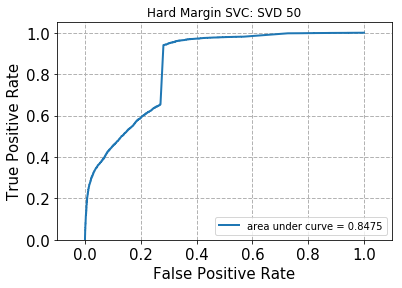

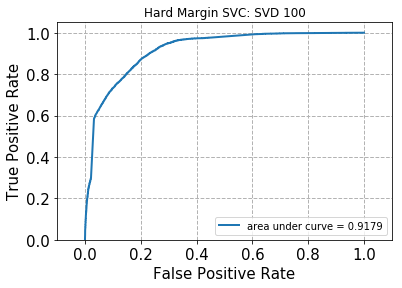

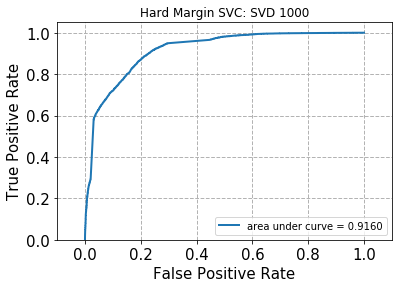

In [324]:
hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, data_svd, labels, "Hard Margin SVC: SVD 50")

hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, get_svd(100), labels, "Hard Margin SVC: SVD 100")

hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, get_svd(1000), labels, "Hard Margin SVC: SVD 1000")

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The confusion matrix is: 
[[13674   871]
 [ 3039  5752]]
The accuracy is: 
0.8324477202605417
The recall is: 
0.6543055397565692
The precision is: 
0.8684886003321758
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The confusion matrix is: 
[[14074   471]
 [ 3713  5078]]
The accuracy is: 
0.8207062050051422
The recall is: 
0.5776362188601979
The precision is: 
0.9151198414128672
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The confusion matrix is: 
[[13797   748]
 [ 3192  5599]]
The accuracy is: 
0.8311621528968118
The recall is: 
0.6369013764076897
The precision is: 
0.8821490467937608


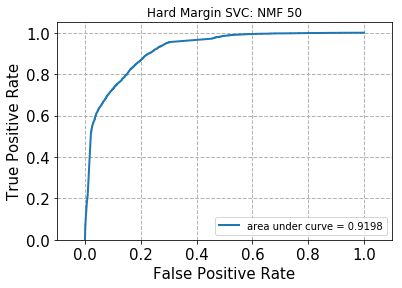

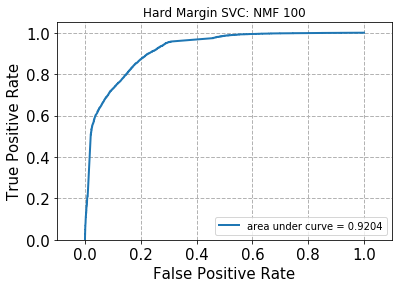

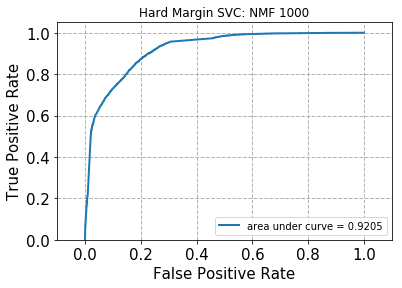

In [325]:
hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, data_nmf, labels, "Hard Margin SVC: NMF 50")

hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, get_nmf(100), labels, "Hard Margin SVC: NMF 100")

hard_margin_svc = LinearSVC(loss = 'hinge', C = 1000)
fit_predict_and_plot(hard_margin_svc, get_nmf(1000), labels, "Hard Margin SVC: NMF 1000")

In [326]:
# LinearSVC Soft Margin with different NMF and SVD

(23336, 50)
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0
(23336, 50)
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(23336, 50)
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


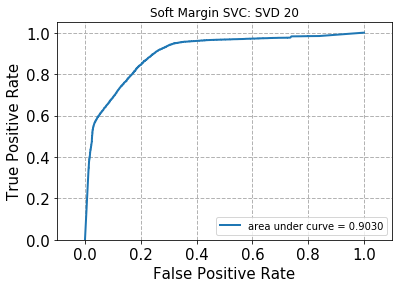

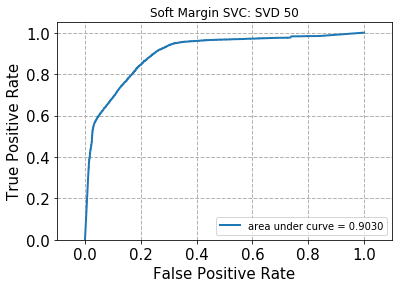

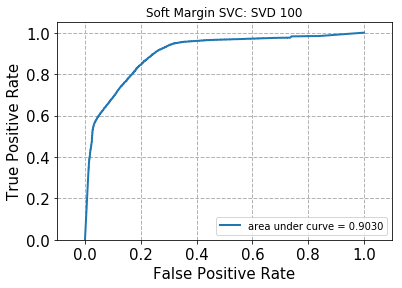

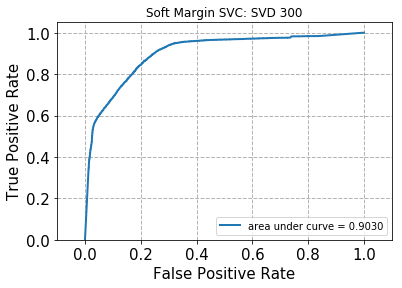

In [329]:
soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_svd(20), labels, "Soft Margin SVC: SVD 20")

soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, data_svd, labels, "Soft Margin SVC: SVD 50")

soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_svd(100), labels, "Soft Margin SVC: SVD 100")

soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_svd(300), labels, "Soft Margin SVC: SVD 300")

(23336, 50)
Soft Margin SVC: NMF 20
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0
Soft Margin SVC: NMF 50
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(23336, 50)
Soft Margin SVC: NMF 100
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(23336, 50)
Soft Margin SVC: NMF 300
The confusion matrix is: 
[[14545     0]
 [ 8791     0]]
The accuracy is: 
0.6232859101816935
The recall is: 
0.0
The precision is: 
0.0


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


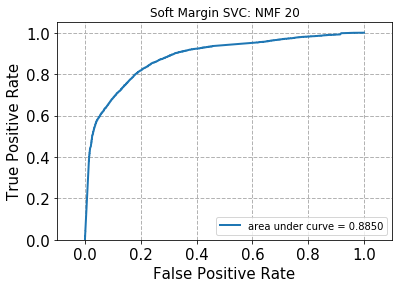

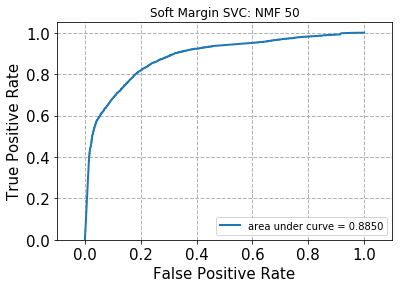

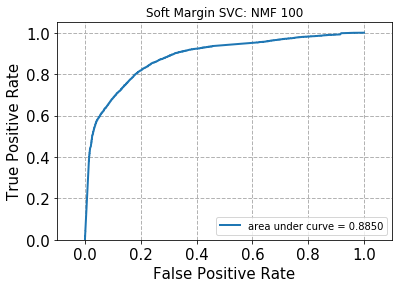

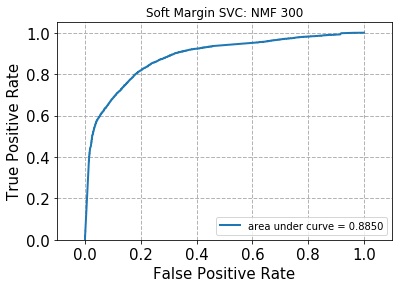

In [332]:
soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_nmf(20), labels, "Soft Margin SVC: NMF 20")

soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, data_nmf, labels, "Soft Margin SVC: NMF 50")


soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_nmf(100), labels, "Soft Margin SVC: NMF 100")

soft_margin_svc = LinearSVC(loss = 'hinge', C = 0.0001)
fit_predict_and_plot(soft_margin_svc, get_nmf(300), labels, "Soft Margin SVC: NMF 300")

In [ ]:
# Logistic Regression

In [348]:
lr_clf = LogisticRegression(penalty='l2', C = 1e30)
fit_predict_and_plot(lr_clf, get_svd(100), labels, "Logistic Regression: SVD 100", verbose = False)

lr_clf = LogisticRegression(penalty='l2', C = 1e30, class_weight='balanced')
fit_predict_and_plot(lr_clf, get_svd(100), labels, "Logistic Regression Balanced: SVD 100", verbose = False)

#Best
lr_clf = LogisticRegression(penalty='l2', C = 1, class_weight='balanced')
fit_predict_and_plot(lr_clf, get_svd(100), labels, "Logistic Regression Balanced C=1: SVD 100", verbose = False)

lr_clf = LogisticRegression(penalty='l2', C = 1)
fit_predict_and_plot(lr_clf, get_svd(100), labels, "Logistic Regression C=1: SVD 100", verbose = False)

(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: SVD 100
The confusion matrix is: 
[[13430  1115]
 [ 2596  6195]]
The accuracy is: 
0.8409753171066164
The recall is: 
0.7046979865771812
The precision is: 
0.847469220246238
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Balanced: SVD 100
The confusion matrix is: 
[[11183  3362]
 [  748  8043]]
The accuracy is: 
0.8238772711690092
The recall is: 
0.9149129791832556
The precision is: 
0.7052170100832968
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Balanced C=1: SVD 100
The confusion matrix is: 
[[11194  3351]
 [  747  8044]]
The accuracy is: 
0.8243914981145012
The recall is: 
0.9150267318848823
The precision is: 
0.7059236507240018
(23336, 50)


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression C=1: SVD 100
The confusion matrix is: 
[[13635   910]
 [ 2888  5903]]
The accuracy is: 
0.8372471717517997
The recall is: 
0.6714821977021954
The precision is: 
0.8664318215176868


Gaussian Naive Bayes: SVD 50
The confusion matrix is: 
[[7510 7035]
 [1433 7358]]
The accuracy is: 
0.6371271854645183
The recall is: 
0.836992378568991
The precision is: 
0.5112207323004239
(23336, 50)
Gaussian Naive Bayes: SVD 100
The confusion matrix is: 
[[7510 7035]
 [1433 7358]]
The accuracy is: 
0.6371271854645183
The recall is: 
0.836992378568991
The precision is: 
0.5112207323004239
(23336, 50)
Gaussian Naive Bayes: SVD 300
The confusion matrix is: 
[[7510 7035]
 [1433 7358]]
The accuracy is: 
0.6371271854645183
The recall is: 
0.836992378568991
The precision is: 
0.5112207323004239


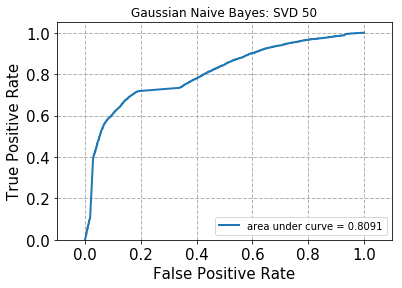

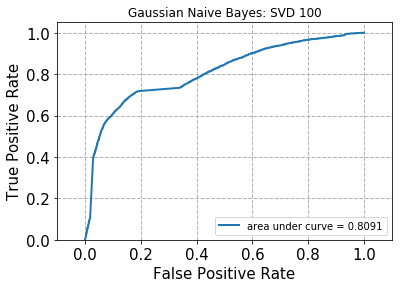

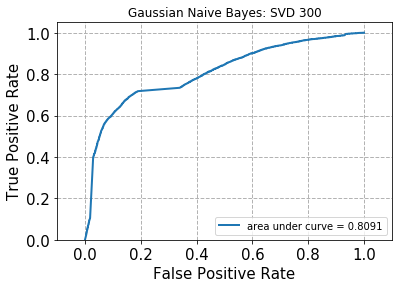

In [343]:
gnb_clf = GaussianNB()
fit_predict_and_plot(gnb_clf, data_svd, labels, "Gaussian Naive Bayes: SVD 50")

gnb_clf = GaussianNB()
fit_predict_and_plot(gnb_clf, get_svd(100), labels, "Gaussian Naive Bayes: SVD 100")

gnb_clf = GaussianNB()
fit_predict_and_plot(gnb_clf, get_svd(300), labels, "Gaussian Naive Bayes: SVD 300")